<a href="https://colab.research.google.com/github/ayoabass777/Impact-of-BoC-Rates-on-Auto-Loans-and-Car-Sales/blob/main/Impact_of_BOC_rate_on_auto_lenders_rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
funds_rate_path = '/content/drive/MyDrive/fund_advanced.csv'
fund_rate_data = pd.read_csv(funds_rate_path)

In [ ]:
# Update the column header to reflect the conversion
fund_rate_data.rename(columns={'Funds advanced of which are auto loans in Dollars  (x 1,000,000)' : 'Funds advanced of which are auto loans in Millions'}, inplace= True)


In [ ]:
fund_rate_data

,Date,Funds advanced of which are auto loans in Millions,Funds advanced of which are auto loans Interest rate
0,Jul-16,"2,743",3.76
1,Aug-16,"2,934",3.71
2,Sep-16,"2,527",3.78
3,Oct-16,"2,316",3.81
4,Nov-16,"2,329",4.05
...,...,...,...
89,Dec-23,"2,652",8.21
90,Jan-24,"2,849",8.24
91,Feb-24,"2,882",8.09
92,Mar-24,"3,239",7.89


###changing the date of the fund advanced data


In [ ]:
# Convert the 'Date' column to the format 'YYYY-MM'
fund_rate_data['Date'] = pd.to_datetime(fund_rate_data['Date'], format='%b-%y').dt.strftime('%Y-%m')

In [ ]:
fund_rate_data

,Date,Funds advanced of which are auto loans in Millions,Funds advanced of which are auto loans Interest rate
0,2016-07,"2,743",3.76
1,2016-08,"2,934",3.71
2,2016-09,"2,527",3.78
3,2016-10,"2,316",3.81
4,2016-11,"2,329",4.05
...,...,...,...
89,2023-12,"2,652",8.21
90,2024-01,"2,849",8.24
91,2024-02,"2,882",8.09
92,2024-03,"3,239",7.89


In [ ]:
new_vehicle_file= '/content/drive/MyDrive/new motor vehicles.csv'

In [ ]:
new_vehicle_data= pd.read_csv(new_vehicle_file)

In [ ]:
new_vehicle_data

,Date,new motor vehicles sales Units,"new motor vehicles sales in Dollars (x 1,000)"
0,Jul-16,"175,846","6,654,406"
1,Aug-16,"174,976","6,691,685"
2,Sep-16,"177,191","6,942,118"
3,Oct-16,"157,414","6,121,957"
4,Nov-16,"163,320","6,467,708"
...,...,...,...
89,Dec-23,"128,827","7,455,783"
90,Jan-24,"116,874","6,417,326"
91,Feb-24,"136,622","7,450,359"
92,Mar-24,"171,641","9,223,052"


In [ ]:
# Scale the 'new motor vehicles sales in Dollars' from thousands to millions
new_vehicle_data['new motor vehicles sales in Dollars (x 1,000)'] = new_vehicle_data['new motor vehicles sales in Dollars (x 1,000)'].str.replace(',', '').astype(float) / 1000

In [ ]:
# Update the column header to reflect the conversion
new_vehicle_data.rename(columns={'new motor vehicles sales in Dollars (x 1,000)': 'new motor vehicles sales in Millions'}, inplace=True)

In [ ]:
new_vehicle_data

,Date,new motor vehicles sales Units,new motor vehicles sales in Millions
0,Jul-16,"175,846",6654.406
1,Aug-16,"174,976",6691.685
2,Sep-16,"177,191",6942.118
3,Oct-16,"157,414",6121.957
4,Nov-16,"163,320",6467.708
...,...,...,...
89,Dec-23,"128,827",7455.783
90,Jan-24,"116,874",6417.326
91,Feb-24,"136,622",7450.359
92,Mar-24,"171,641",9223.052


###changing the date of the fund advanced data

In [ ]:
# Convert the 'Date' column to the format 'YYYY-MM'
new_vehicle_data['Date'] = pd.to_datetime(new_vehicle_data['Date'], format='%b-%y').dt.strftime('%Y-%m')

In [ ]:
new_vehicle_data

,Date,new motor vehicles sales Units,new motor vehicles sales in Millions
0,2016-07,"175,846",6654.406
1,2016-08,"174,976",6691.685
2,2016-09,"177,191",6942.118
3,2016-10,"157,414",6121.957
4,2016-11,"163,320",6467.708
...,...,...,...
89,2023-12,"128,827",7455.783
90,2024-01,"116,874",6417.326
91,2024-02,"136,622",7450.359
92,2024-03,"171,641",9223.052


In [ ]:
#adding the Auto loans credit liability of household data
Credit_liabilities_file = '/content/drive/MyDrive/Auto loans credit liability of house holds.csv'

In [ ]:
Credit_liabilities_data = pd.read_csv(Credit_liabilities_file)

In [ ]:
Credit_liabilities_data['Date'] = pd.to_datetime(Credit_liabilities_data['Date'], format='%b-%y').dt.strftime('%Y-%m')


In [ ]:

Credit_liabilities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Date                                                      94 non-null     object
 1    Auto loans Credit liabilities of households in Millions  94 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [ ]:
Credit_liabilities_data

,Date,Auto loans Credit liabilities of households in Millions
0,2016-07,"76,374"
1,2016-08,"76,220"
2,2016-09,"76,500"
3,2016-10,"76,707"
4,2016-11,"76,924"
...,...,...
89,2023-12,"101,018"
90,2024-01,"100,650"
91,2024-02,"100,547"
92,2024-03,"100,667"


###Uploadig the daily bank of canda interests

In [ ]:
BoC_rates_file= '/content/drive/MyDrive/Bank of Canada rate.csv'

In [ ]:
BoC_rates_data = pd.read_csv(BoC_rates_file)

In [ ]:
BoC_rates_data

,Date,Canadian Interest Rates
0,2024-04-30,5.25
1,2024-04-29,5.25
2,2024-04-26,5.25
3,2024-04-25,5.25
4,2024-04-24,5.25
...,...,...
2038,2016-07-07,0.75
2039,2016-07-06,0.75
2040,2016-07-05,0.75
2041,2016-07-04,0.75


#####Change date from object to date type

#####Changing format from 'YYYY-MM-DD' to 'YYYY-MM'

In [ ]:
BoC_rates_data['Date']= pd.to_datetime(BoC_rates_data['Date'])

In [ ]:
BoC_rates_data['Date']= BoC_rates_data['Date'].dt.to_period('M')

####Chabging back to datetime data type

In [ ]:
BoC_rates_data['Date']= BoC_rates_data['Date'].dt.to_timestamp()
BoC_rates_data['Date'] = pd.to_datetime(BoC_rates_data['Date'], format='%b-%y').dt.strftime('%Y-%m')

####Sorting BoC interest by Date in an ascending order

In [ ]:
BoC_rates_data = BoC_rates_data.sort_values(by='Date')

In [ ]:
BoC_rates_data = BoC_rates_data.reset_index(drop=True)

In [ ]:
BoC_rates_data

,Date,Canadian Interest Rates
0,2016-07,0.75
1,2016-07,0.75
2,2016-07,0.75
3,2016-07,0.75
4,2016-07,0.75
...,...,...
2038,2024-04,5.25
2039,2024-04,5.25
2040,2024-04,5.25
2041,2024-04,5.25


#### Removing the 'Bank holiday' from the data

In [ ]:
Bank_holiday = BoC_rates_data[BoC_rates_data['Canadian Interest Rates']==' Bank holiday'].index

In [ ]:
Bank_holiday

Index([1603, 1619, 1623, 1645, 1671, 1678, 1679, 1706, 1719, 1775, 1782, 1836,
       1863, 1882, 1901, 1907, 1932, 1939, 1940, 1978, 1986, 2003],
      dtype='int64')

In [ ]:
BoC_rates_data = BoC_rates_data.drop(Bank_holiday)


In [ ]:
BoC_rates_data['Canadian Interest Rates'] =BoC_rates_data['Canadian Interest Rates'].astype(float)

####Finding the avergae of the rates each month

In [ ]:
BoC_rates_data = BoC_rates_data.groupby('Date')['Canadian Interest Rates'].mean().reset_index()
BoC_rates_data

,Date,Canadian Interest Rates
0,2016-07,0.75
1,2016-08,0.75
2,2016-09,0.75
3,2016-10,0.75
4,2016-11,0.75
...,...,...
89,2023-12,5.25
90,2024-01,5.25
91,2024-02,5.25
92,2024-03,5.25


##Merging data together

In [ ]:
merge2= pd.merge(BoC_rates_data, Credit_liabilities_data, how= 'outer', on='Date')
merge2

,Date,Canadian Interest Rates,Auto loans Credit liabilities of households in Millions
0,2016-07,0.75,"76,374"
1,2016-08,0.75,"76,220"
2,2016-09,0.75,"76,500"
3,2016-10,0.75,"76,707"
4,2016-11,0.75,"76,924"
...,...,...,...
89,2023-12,5.25,"101,018"
90,2024-01,5.25,"100,650"
91,2024-02,5.25,"100,547"
92,2024-03,5.25,"100,667"


In [ ]:
merge1 =pd.merge(fund_rate_data, new_vehicle_data, how= 'outer', on='Date')
merge1

,Date,Funds advanced of which are auto loans in Millions,Funds advanced of which are auto loans Interest rate,new motor vehicles sales Units,new motor vehicles sales in Millions
0,2016-07,"2,743",3.76,"175,846",6654.406
1,2016-08,"2,934",3.71,"174,976",6691.685
2,2016-09,"2,527",3.78,"177,191",6942.118
3,2016-10,"2,316",3.81,"157,414",6121.957
4,2016-11,"2,329",4.05,"163,320",6467.708
...,...,...,...,...,...
89,2023-12,"2,652",8.21,"128,827",7455.783
90,2024-01,"2,849",8.24,"116,874",6417.326
91,2024-02,"2,882",8.09,"136,622",7450.359
92,2024-03,"3,239",7.89,"171,641",9223.052


In [ ]:
Data = pd.merge(merge1,merge2, how='outer', on='Date')
Data

,Date,Funds advanced of which are auto loans in Millions,Funds advanced of which are auto loans Interest rate,new motor vehicles sales Units,new motor vehicles sales in Millions,Canadian Interest Rates,Auto loans Credit liabilities of households in Millions
0,2016-07,"2,743",3.76,"175,846",6654.406,0.75,"76,374"
1,2016-08,"2,934",3.71,"174,976",6691.685,0.75,"76,220"
2,2016-09,"2,527",3.78,"177,191",6942.118,0.75,"76,500"
3,2016-10,"2,316",3.81,"157,414",6121.957,0.75,"76,707"
4,2016-11,"2,329",4.05,"163,320",6467.708,0.75,"76,924"
...,...,...,...,...,...,...,...
89,2023-12,"2,652",8.21,"128,827",7455.783,5.25,"101,018"
90,2024-01,"2,849",8.24,"116,874",6417.326,5.25,"100,650"
91,2024-02,"2,882",8.09,"136,622",7450.359,5.25,"100,547"
92,2024-03,"3,239",7.89,"171,641",9223.052,5.25,"100,667"


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date                                                      94 non-null     object 
 1   Funds advanced of which are auto loans in Millions        94 non-null     object 
 2   Funds advanced of which are auto loans Interest rate      94 non-null     float64
 3   new motor vehicles sales Units                            94 non-null     object 
 4   new motor vehicles sales in Millions                      94 non-null     float64
 5   Canadian Interest Rates                                   94 non-null     float64
 6    Auto loans Credit liabilities of households in Millions  94 non-null     object 
dtypes: float64(3), object(4)
memory usage: 5.3+ KB


In [ ]:
Data.isnull().sum()

Date                                                        0
Funds advanced of which are auto loans in Millions          0
Funds advanced of which are auto loans Interest rate        0
new motor vehicles sales Units                              0
new motor vehicles sales in Millions                        0
Canadian Interest Rates                                     0
 Auto loans Credit liabilities of households in Millions    0
dtype: int64

In [ ]:
#changing the date variable from an object to a datetime data type
Data['Date']= pd.to_datetime(Data['Date'])

In [ ]:
##changing Funds advanced of which are auto loans in Millions from object to int
Data['Funds advanced of which are auto loans in Millions'] = Data['Funds advanced of which are auto loans in Millions'].str.replace(',','').astype(int)

In [ ]:
#changing new motor vehicle sales units from object to int
Data['new motor vehicles sales Units'] = Data['new motor vehicles sales Units'].str.replace(',', '').astype(int)

In [ ]:
##changing Funds advanced of which are auto loans Interest rate from object to int
Data[' Auto loans Credit liabilities of households in Millions'] = Data[' Auto loans Credit liabilities of households in Millions'].str.replace(',','').astype(int)

In [ ]:
Data.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
Date,94,2020-05-16 15:34:28.085106432,2016-07-01 00:00:00,2018-06-08 12:00:00,2020-05-16 12:00:00,2022-04-23 12:00:00,2024-04-01 00:00:00,NaN
Funds advanced of which are auto loans in Millions,94.0,2990.93617,1013.0,2604.25,3063.0,3485.5,4128.0,586.299436
Funds advanced of which are auto loans Interest rate,94.0,5.352021,3.71,4.29,4.88,5.73,8.33,1.420408
new motor vehicles sales Units,94.0,152056.904255,47508.0,127580.25,152773.5,175651.0,220858.0,32605.475557
new motor vehicles sales in Millions,94.0,7002.917553,2305.372,6125.22975,7242.873,8011.4225,9722.96,1375.595398
Canadian Interest Rates,94.0,1.941029,0.5,0.733696,1.5,2.0,5.25,1.624608
Auto loans Credit liabilities of households in Millions,94.0,88802.255319,76220.0,83499.5,89810.0,92844.75,101261.0,7211.828378


In [ ]:
#setting Date as the index

Data.set_index('Date', inplace= True)

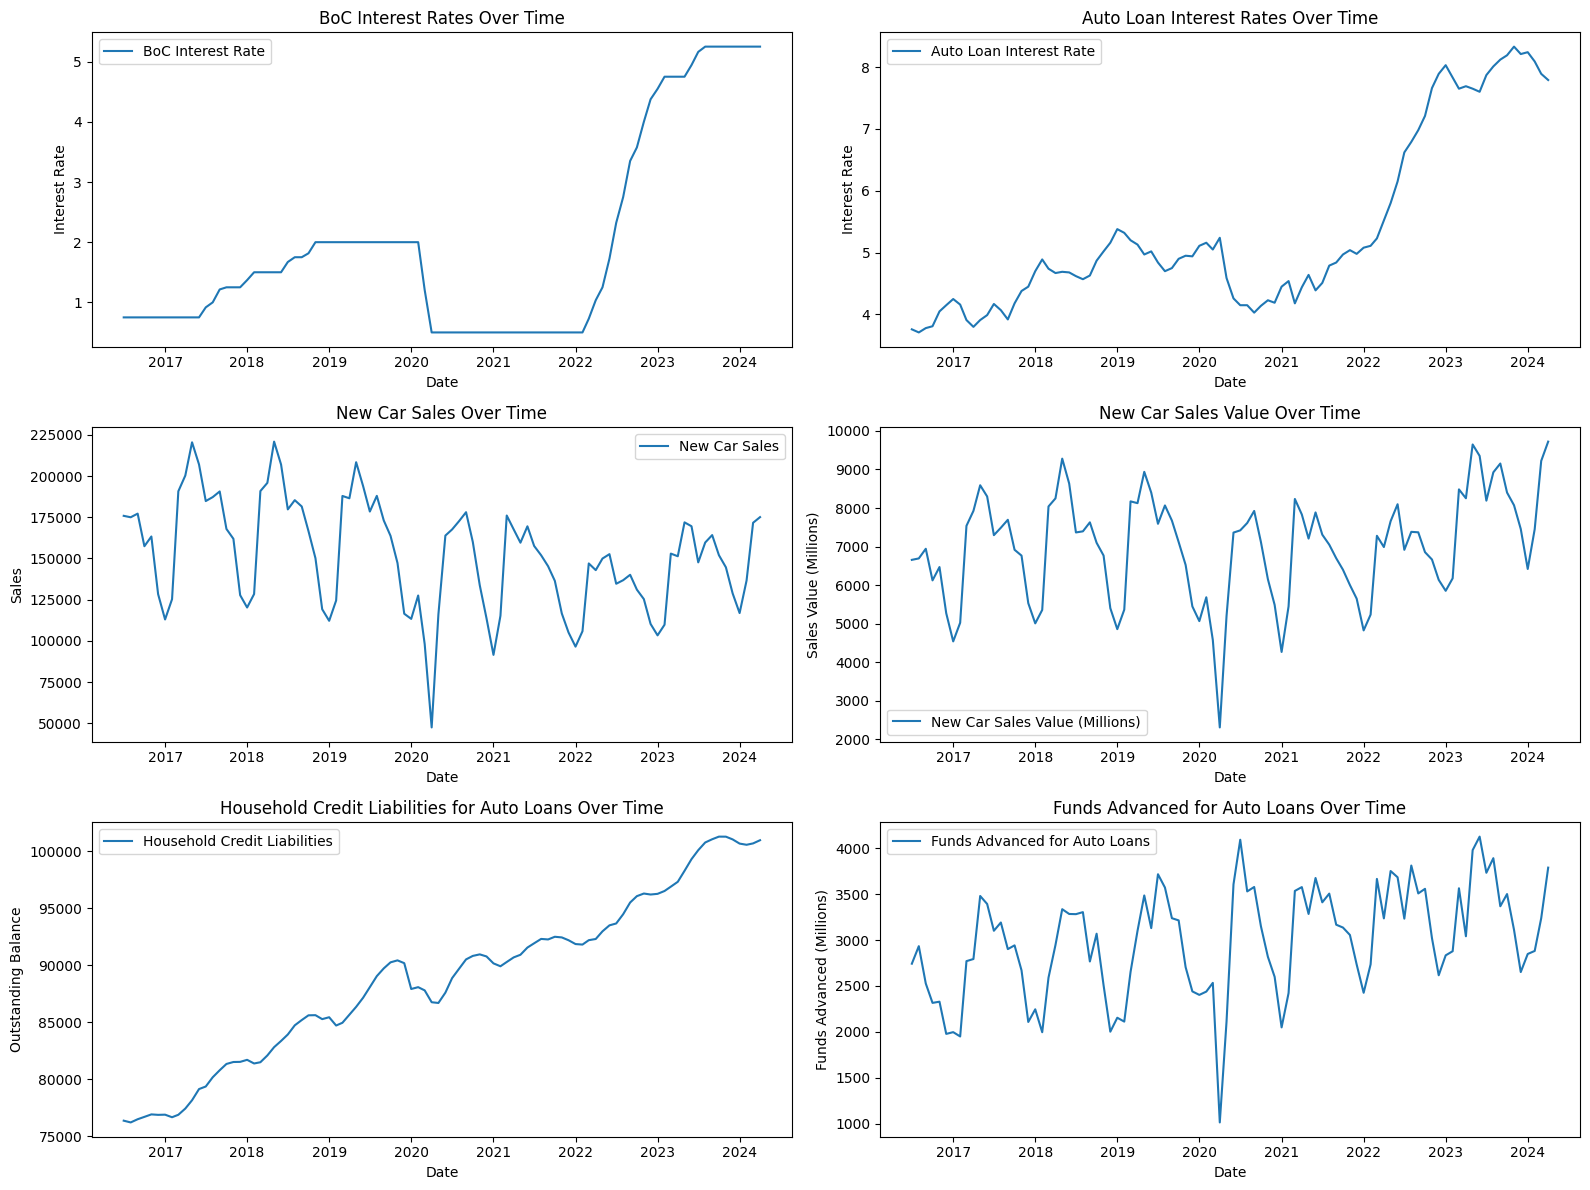

In [ ]:
plt.figure(figsize=(16, 12))

# Plot BoC Interest Rates
plt.subplot(3, 2, 1)
plt.plot(Data.index, Data['Canadian Interest Rates'], label='BoC Interest Rate')
plt.title('BoC Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()

# Plot Auto Loan Interest Rates
plt.subplot(3, 2, 2)
plt.plot(Data.index, Data['Funds advanced of which are auto loans Interest rate'], label='Auto Loan Interest Rate')
plt.title('Auto Loan Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()

# Plot New Car Sales
plt.subplot(3, 2, 3)
plt.plot(Data.index, Data['new motor vehicles sales Units'], label='New Car Sales')
plt.title('New Car Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Plot New Car Sales Value
plt.subplot(3, 2, 4)
plt.plot(Data.index, Data['new motor vehicles sales in Millions'], label='New Car Sales Value (Millions)')
plt.title('New Car Sales Value Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Value (Millions)')
plt.legend()

# Plot Household Credit Liabilities for Auto Loans
plt.subplot(3, 2, 5)
plt.plot(Data.index, Data[' Auto loans Credit liabilities of households in Millions'], label='Household Credit Liabilities')
plt.title('Household Credit Liabilities for Auto Loans Over Time')
plt.xlabel('Date')
plt.ylabel('Outstanding Balance')
plt.legend()

# Plot Funds Advanced for Auto Loans
plt.subplot(3, 2, 6)
plt.plot(Data.index, Data['Funds advanced of which are auto loans in Millions'], label='Funds Advanced for Auto Loans')
plt.title('Funds Advanced for Auto Loans Over Time')
plt.xlabel('Date')
plt.ylabel('Funds Advanced (Millions)')
plt.legend()

plt.tight_layout()
plt.show()

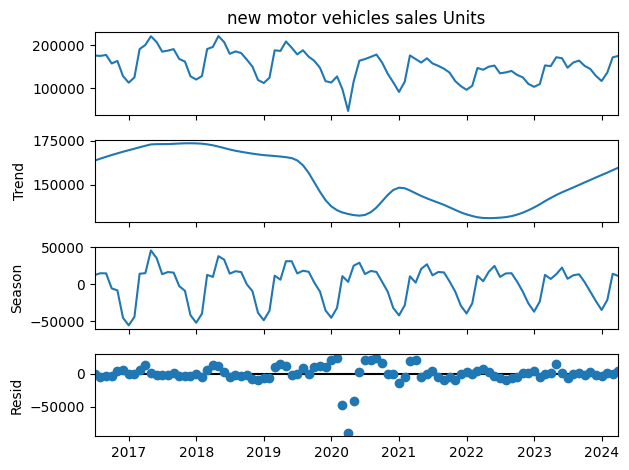

In [ ]:
from statsmodels.tsa.seasonal import STL
#For 'new motor vehicles sales Units'
series = Data['new motor vehicles sales Units']
stl =STL(series, seasonal =13)
result = stl.fit()
result.plot()
plt.show()

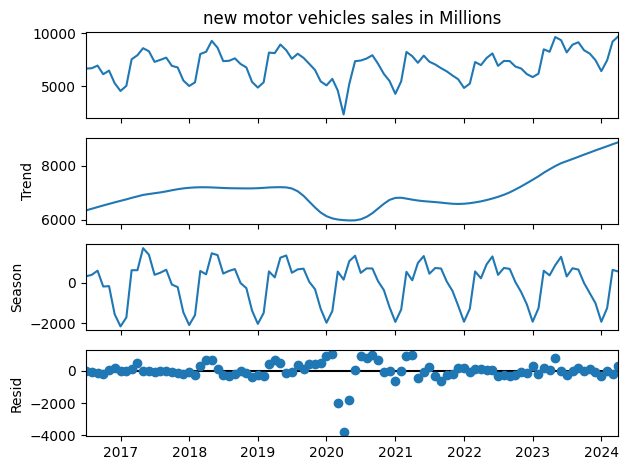

In [ ]:
#For 'new motor vehicles sales in Millions'
series = Data['new motor vehicles sales in Millions']
stl =STL(series, seasonal =13)
result = stl.fit()
result.plot()
plt.show()

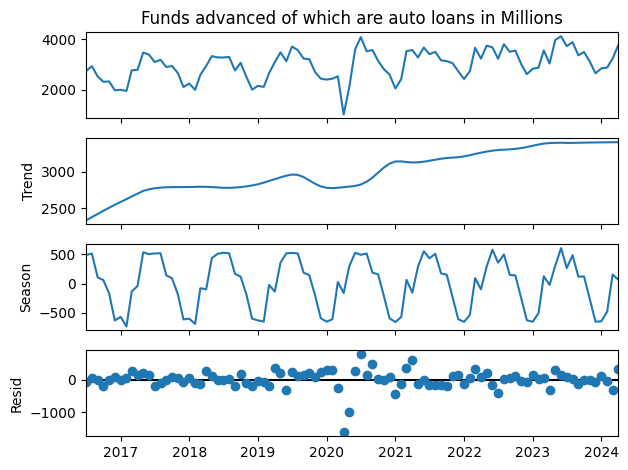

In [ ]:
#For 'Funds advanced of which are auto loans in Millions'
series = Data['Funds advanced of which are auto loans in Millions']
stl =STL(series, seasonal =13)
result = stl.fit()
result.plot()
plt.show()

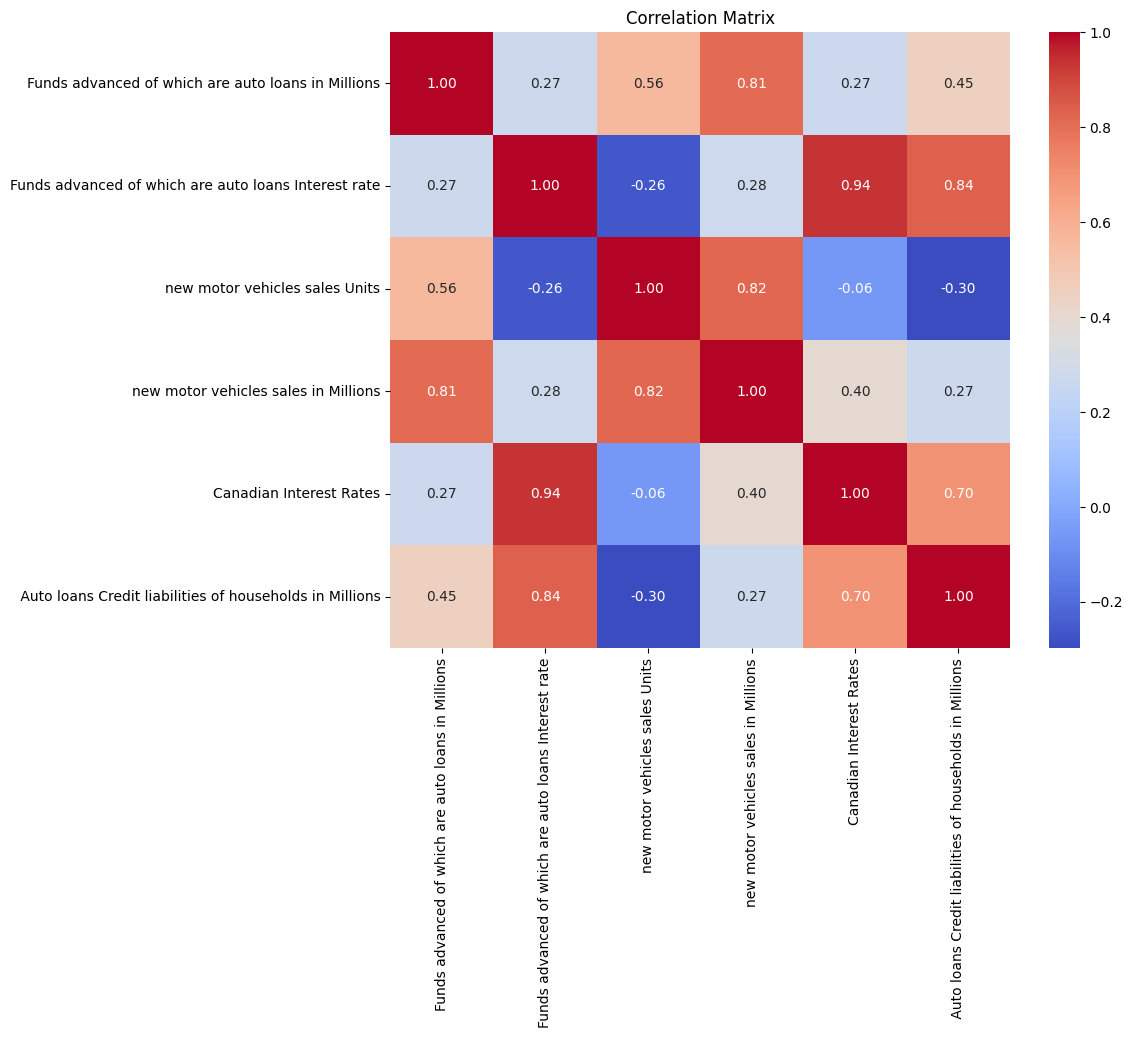

In [ ]:
# Calculating correlations

correlations = Data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import statsmodels.api as sm

# Regression: BoC Interest Rates vs. Auto Loan Interest Rates
X = Data['Canadian Interest Rates']
y = Data['Funds advanced of which are auto loans Interest rate']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

# Regression: Auto Loan Interest Rates vs. New Car Sales
X = Data['Funds advanced of which are auto loans Interest rate']
y = Data['new motor vehicles sales Units']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

# Regression: Funds Advanced for Auto Loans vs. new motor vehicles sales value
X = Data['Funds advanced of which are auto loans in Millions']
y = Data['new motor vehicles sales in Millions']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

# Regression: Auto Loan Interest Rates vs. Household Credit Liabilities
X = Data['Funds advanced of which are auto loans Interest rate']
y = Data[' Auto loans Credit liabilities of households in Millions']
X = sm.add_constant(X)  # Adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())




                                             OLS Regression Results                                             
Dep. Variable:     Funds advanced of which are auto loans Interest rate   R-squared:                       0.882
Model:                                                              OLS   Adj. R-squared:                  0.881
Method:                                                   Least Squares   F-statistic:                     687.7
Date:                                                  Thu, 27 Jun 2024   Prob (F-statistic):           1.78e-44
Time:                                                          20:12:46   Log-Likelihood:                -65.422
No. Observations:                                                    94   AIC:                             134.8
Df Residuals:                                                        92   BIC:                             139.9
Df Model:                                                             1                         